In [1]:
# Easier to make graphs and print computations here

In [38]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from scipy import stats

svm_ratings = genfromtxt('CS_475_Final_Project\code\datasets\svm_new_ratings.csv', delimiter=',')
original_ratings = genfromtxt('CS_475_Final_Project\code\datasets\original_amazon_ratings.csv', delimiter=',')

Text(0, 0.5, 'Count')

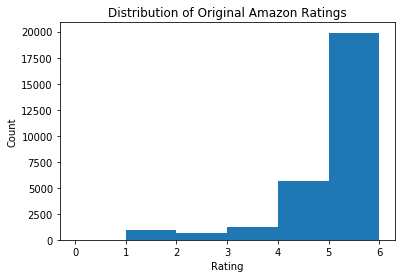

In [39]:
plt.hist(original_ratings, bins=[0,1,2,3,4,5,6])
plt.title('Distribution of Original Amazon Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

In [40]:
print('5 Star Ratings:', np.count_nonzero(original_ratings==5))
print('4 Star Ratings:', np.count_nonzero(original_ratings==4))
print('3 Star Ratings:', np.count_nonzero(original_ratings==3))
print('2 Star Ratings:', np.count_nonzero(original_ratings==2))
print('1 Star Ratings:', np.count_nonzero(original_ratings==1))

5 Star Ratings: 19897
4 Star Ratings: 5648
3 Star Ratings: 1206
2 Star Ratings: 616
1 Star Ratings: 965


Text(0, 0.5, 'Count')

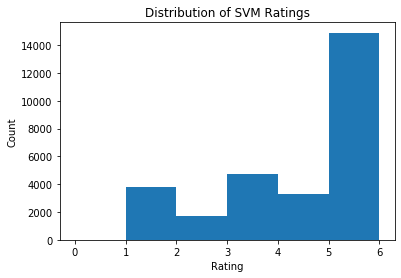

In [41]:
plt.hist(svm_ratings, bins=[0,1,2,3,4,5,6])
plt.title('Distribution of SVM Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

In [42]:
print('5 Star Ratings:', np.count_nonzero(svm_ratings==5))
print('4 Star Ratings:', np.count_nonzero(svm_ratings==4))
print('3 Star Ratings:', np.count_nonzero(svm_ratings==3))
print('2 Star Ratings:', np.count_nonzero(svm_ratings==2))
print('1 Star Ratings:', np.count_nonzero(svm_ratings==1))

5 Star Ratings: 14893
4 Star Ratings: 3266
3 Star Ratings: 4723
2 Star Ratings: 1686
1 Star Ratings: 3764


In [43]:
# change metrics for all ratings
change = svm_ratings - original_ratings # gives array of amount each rating changed by
print('Mean Change:', np.mean(change)) # overall mean amout reviews were changed by
print('Median Change:', np.median(change))
print('Standard Deviation of Change:', np.std(change))

Mean Change: -0.6726669490328957
Median Change: 0.0
Standard Deviation of Change: 1.4872310919814045


In [49]:
# change metrics for each rating class (1-5)
original_five_ratings = original_ratings[np.where(original_ratings==5)]
svm_five_ratings = svm_ratings[np.where(original_ratings==5)]
change_five_ratings = svm_five_ratings - original_five_ratings

original_four_ratings = original_ratings[np.where(original_ratings==4)]
svm_four_ratings = svm_ratings[np.where(original_ratings==4)]
change_four_ratings = svm_four_ratings - original_four_ratings

original_three_ratings = original_ratings[np.where(original_ratings==3)]
svm_three_ratings = svm_ratings[np.where(original_ratings==3)]
change_three_ratings = svm_three_ratings - original_three_ratings

original_two_ratings = original_ratings[np.where(original_ratings==2)]
svm_two_ratings = svm_ratings[np.where(original_ratings==2)]
change_two_ratings = svm_two_ratings - original_two_ratings

original_one_ratings = original_ratings[np.where(original_ratings==1)]
svm_one_ratings = svm_ratings[np.where(original_ratings==1)]
change_one_ratings = svm_one_ratings - original_one_ratings

In [54]:
# find stats for each rating class
print('5 Mean Change:', np.mean(change_five_ratings))
print('5 Median Change:', np.median(change_five_ratings))
print('5 Standard Deviation of Change:', np.std(change_five_ratings))
print('')
print('4 Mean Change:', np.mean(change_four_ratings))
print('4 Median Change:', np.median(change_four_ratings))
print('4 Standard Deviation of Change:', np.std(change_four_ratings))
print('')
print('3 Mean Change:', np.mean(change_three_ratings))
print('3 Median Change:', np.median(change_three_ratings))
print('3 Standard Deviation of Change:', np.std(change_three_ratings))
print('')
print('2 Mean Change:', np.mean(change_two_ratings))
print('2 Median Change:', np.median(change_two_ratings))
print('2 Standard Deviation of Change:', np.std(change_two_ratings))
print('')
print('1 Mean Change:', np.mean(change_one_ratings))
print('1 Median Change:', np.median(change_one_ratings))
print('1 Standard Deviation of Change:', np.std(change_one_ratings))

5 Mean Change: -0.9912047042267679
5 Median Change: 0.0
5 Standard Deviation of Change: 1.3600363932503632

4 Mean Change: -0.15846317280453256
4 Median Change: 1.0
4 Standard Deviation of Change: 1.4215295858245918

3 Mean Change: 0.10945273631840796
3 Median Change: 0.0
3 Standard Deviation of Change: 1.591736600481295

2 Mean Change: 0.6233766233766234
2 Median Change: 0.0
2 Standard Deviation of Change: 1.5100439577239888

1 Mean Change: 1.0808290155440414
1 Median Change: 1.0
1 Standard Deviation of Change: 1.3419092950928329


In [73]:
# find ratio of up to down for each rating class
print('Interpreted as Given Rating was X, Probability it was Inc/Dec/Unc is ...')
print('')
print('Number of Decreased 5 Star Ratings:', len(np.where(change_five_ratings<0)[0]), '=', (len(np.where(change_five_ratings<0)[0])/len(change_five_ratings))*100, '%')
print('Numer of Unchanged 5 Star Ratings:', len(np.where(change_five_ratings==0)[0]), '=',(len(np.where(change_five_ratings==0)[0])/len(change_five_ratings))*100, '%')# no > 0 class here as 5 ratings cant go up
print('')
print('Number of Increased 4 Star Ratings:', len(np.where(change_four_ratings>0)[0]), '=',(len(np.where(change_four_ratings>0)[0])/len(change_four_ratings))*100, '%')
print('Number of Decreased 4 Star Ratings:', len(np.where(change_four_ratings<0)[0]), '=',(len(np.where(change_four_ratings<0)[0])/len(change_four_ratings))*100, '%')
print('Numer of Unchanged 4 Star Ratings:', len(np.where(change_four_ratings==0)[0]), '=',(len(np.where(change_four_ratings==0)[0])/len(change_four_ratings))*100, '%')
print('')
print('Number of Increased 3 Star Ratings:', len(np.where(change_three_ratings>0)[0]), '=',(len(np.where(change_three_ratings>0)[0])/len(change_three_ratings))*100, '%')
print('Number of Decreased 3 Star Ratings:', len(np.where(change_three_ratings<0)[0]), '=',(len(np.where(change_three_ratings<0)[0])/len(change_three_ratings))*100, '%')
print('Numer of Unchanged 3 Star Ratings:', len(np.where(change_three_ratings==0)[0]), '=',(len(np.where(change_three_ratings==0)[0])/len(change_three_ratings))*100, '%')
print('')
print('Number of Increased 2 Star Ratings:', len(np.where(change_two_ratings>0)[0]), '=',(len(np.where(change_two_ratings>0)[0])/len(change_two_ratings))*100, '%')
print('Number of Decreased 2 Star Ratings:', len(np.where(change_two_ratings<0)[0]), '=',(len(np.where(change_two_ratings<0)[0])/len(change_two_ratings))*100, '%')
print('Numer of Unchanged 2 Star Ratings:', len(np.where(change_two_ratings==0)[0]), '=',(len(np.where(change_two_ratings==0)[0])/len(change_two_ratings))*100, '%')
print('')
print('Number of Increased 1 Star Ratings:', len(np.where(change_one_ratings>0)[0]),'=', (len(np.where(change_one_ratings>0)[0])/len(change_one_ratings))*100, '%')
print('Numer of Unchanged 1 Star Ratings:', len(np.where(change_one_ratings==0)[0]),'=', (len(np.where(change_one_ratings==0)[0])/len(change_one_ratings))*100, '%')

Interpreted as Given Rating was X, Probability it was Inc/Dec/Unc is ...

Number of Decreased 5 Star Ratings: 8500 = 42.72000804141328 %
Numer of Unchanged 5 Star Ratings: 11397 = 57.27999195858672 %

Number of Increased 4 Star Ratings: 2882 = 51.02691218130312 %
Number of Decreased 4 Star Ratings: 2033 = 35.99504249291785 %
Numer of Unchanged 4 Star Ratings: 733 = 12.978045325779036 %

Number of Increased 3 Star Ratings: 518 = 42.95190713101161 %
Number of Decreased 3 Star Ratings: 443 = 36.73300165837479 %
Numer of Unchanged 3 Star Ratings: 245 = 20.3150912106136 %

Number of Increased 2 Star Ratings: 283 = 45.94155844155844 %
Number of Decreased 2 Star Ratings: 201 = 32.62987012987013 %
Numer of Unchanged 2 Star Ratings: 132 = 21.428571428571427 %

Number of Increased 1 Star Ratings: 490 = 50.77720207253886 %
Numer of Unchanged 1 Star Ratings: 475 = 49.22279792746114 %
